### Sales Drive Analysis

<h> Problem Statement: </h>
    <p> We need to find out the the factors that influence the Sales of the store. Based on the information we have in this dataset we will analyse and findout 3 to 4 factors that are driving the sales and hence we will work on improving those factors and targetting increased no. of sales. </p>

<h> Factors that might affecting the sales </h>
    <li> Store Location </li>
    <li> Products Availability </li>
    <li> Promotion/Offers/Discounts </li>
    <li> Products placement at the store </li>
    <li> Parking Area Avalibility </li>
    <li> No. of Counters at the Store </li>
    <li> No. of Stores in the City </li>
    

<img src="Store_Image.jfif" height="350" width="350">

### Importing the necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

### Exploring the Data

In [3]:
dataset = pd.read_excel("C:\\ML_Practice_Data\\Sample Dataset.xlsx",encoding ="latin1" )

In [4]:
dataset.shape

(524, 23)

In [5]:
dataset.head()

,black_hispanic,Hispanic_HHs_Index,HHs_Index_Income_75K_9999K,HHs_55_64,Total_Selling_Area,Store_Format,P26_Demand_Index,P164_Demand_Index,sales,format,...,sf2,sf3,channel_1,channel_2,channel_3,channel_4,channel_5,geography,Date,Unnamed: 22
0,91,28,99,804,47000,Food/Drug Combo,108.793008,97.554004,85.443171,1,...,0,0,0,0,0,1,0,north,2008-01-01 00:00:00,1.0
1,24,6,102,1116,53000,Food/Drug Combo,87.878645,118.260131,97.562195,1,...,0,0,0,0,0,1,0,north,2008-02-01 00:00:00,2.0
2,398,181,96,691,45000,Food/Drug Combo,98.072708,117.473440,70.620488,1,...,0,0,0,0,0,1,0,north,2008-03-01 00:00:00,3.0
3,209,30,111,892,55000,Food/Drug Combo,101.325653,95.978476,106.092857,1,...,0,0,0,1,0,0,0,north,2008-04-01 00:00:00,4.0
4,448,123,87,717,50000,Food/Drug Combo,94.171104,97.021200,80.119091,1,...,0,0,0,1,0,0,0,north,2008-05-01 00:00:00,5.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 23 columns):
black_hispanic                524 non-null int64
Hispanic_HHs_Index            524 non-null int64
HHs_Index_Income_75K_9999K    524 non-null int64
HHs_55_64                     524 non-null int64
Total_Selling_Area            524 non-null int64
Store_Format                  524 non-null object
P26_Demand_Index              524 non-null float64
P164_Demand_Index             524 non-null float64
sales                         524 non-null float64
format                        524 non-null int64
cluster_flag                  524 non-null int64
Chiller_flag                  523 non-null float64
sf1                           524 non-null int64
sf2                           524 non-null int64
sf3                           524 non-null int64
channel_1                     524 non-null int64
channel_2                     524 non-null int64
channel_3                     524 non-null int64
chan

### Data PreProcessing 

In [7]:
dataset.isnull().sum()

black_hispanic                 0
Hispanic_HHs_Index             0
HHs_Index_Income_75K_9999K     0
HHs_55_64                      0
Total_Selling_Area             0
Store_Format                   0
P26_Demand_Index               0
P164_Demand_Index              0
sales                          0
format                         0
cluster_flag                   0
Chiller_flag                   1
sf1                            0
sf2                            0
sf3                            0
channel_1                      0
channel_2                      0
channel_3                      0
channel_4                      0
channel_5                      0
geography                      0
Date                           0
Unnamed: 22                   26
dtype: int64

##### Null Value Tratement : After null values we have identified that only chiller flag have 1 percent of null values(Negligble effect if we treat wwith mean or median)

#### A visual representation of null value treatement

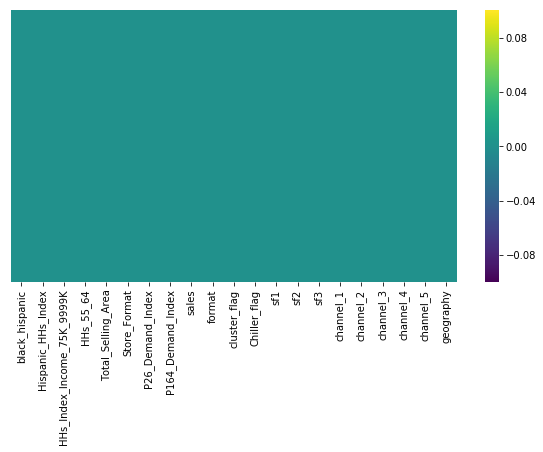

In [27]:
plt.figure(figsize=(10,5))
sb.heatmap(dataset.isnull(),cmap = 'viridis',yticklabels=False)

### 1. Null Vlaue Treatment

In [ ]:
# null_value_table=(dataset.isna().sum()/dataset.shape[0])*100  
# null_value_table

# retained_columns=null_value_table[null_value_table<30].index 
# retained_columns.shape
# drop_columns=null_value_table[null_value_table>30].index  

# dataset.drop(drop_columns,axis=1,inplace=True)  

# len(dataset.isna().sum().index)  

# cont=dataset.describe().columns 
# cont

# cat=[i for i in dataset.columns if i not in dataset.describe().columns]  
# for i in cat:  

#     dataset[i].fillna(dataset[i].value_counts().index[0],inplace=True)  

# for i in cont:  

#     dataset[i].fillna(dataset[i].median(),inplace=True)

In [ ]:
# dataset.isnull().sum()

In [9]:
dataset.drop(["Unnamed: 22","Date"],axis=1,inplace=True)

In [10]:
dataset["Chiller_flag"].fillna(1,inplace = True)
# dataset['Chiller_flag']

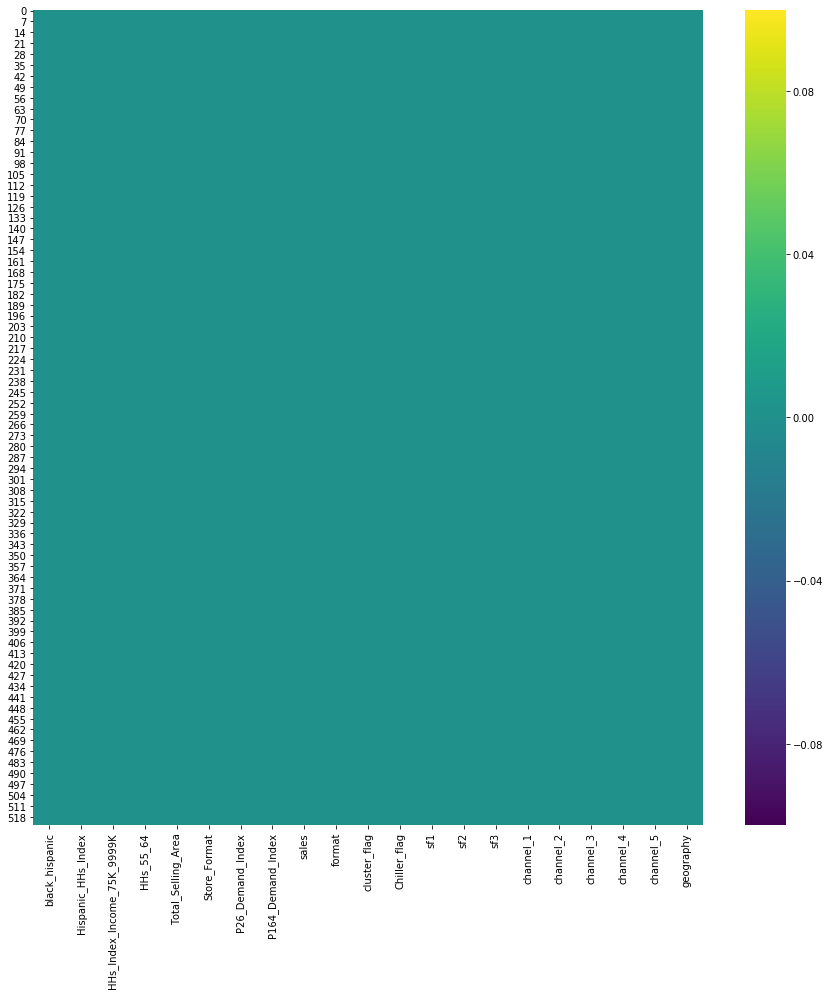

In [11]:
plt.figure(figsize=(15,15))
sb.heatmap(dataset.isnull(),cmap = 'viridis')

### 2. Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
for i in dataset:
    le = LabelEncoder()
    le.fit(dataset[i])
    x = le.transform(dataset[i])
    dataset[i] = x

In [13]:
dataset.head()

,black_hispanic,Hispanic_HHs_Index,HHs_Index_Income_75K_9999K,HHs_55_64,Total_Selling_Area,Store_Format,P26_Demand_Index,P164_Demand_Index,sales,format,...,Chiller_flag,sf1,sf2,sf3,channel_1,channel_2,channel_3,channel_4,channel_5,geography
0,83,25,45,328,28,0,258,170,319,0,...,3,1,0,0,0,0,0,1,0,0
1,23,3,48,364,34,0,56,358,362,0,...,3,1,0,0,0,0,0,1,0,0
2,227,149,42,294,26,0,125,355,261,0,...,3,1,0,0,0,0,0,1,0,0
3,166,27,57,340,36,0,167,157,382,0,...,2,1,0,0,0,1,0,0,0,0
4,238,113,33,301,31,0,91,165,303,0,...,2,1,0,0,0,1,0,0,0,0


### 3. Univariant and Bivariant Analysis

In [14]:
dataset.var().sort_values(ascending = False).head(10)
# .index[0:10]

sales                         22390.321122
P26_Demand_Index              16522.877118
P164_Demand_Index             15454.597766
HHs_55_64                     11429.734007
black_hispanic                 7004.116193
Hispanic_HHs_Index             2541.787208
HHs_Index_Income_75K_9999K      485.348956
Total_Selling_Area              275.250255
cluster_flag                      2.454877
format                            2.276134
dtype: float64

###  Univariant Analysis

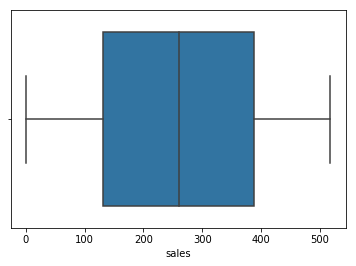

In [15]:
sb.boxplot(dataset['sales'])

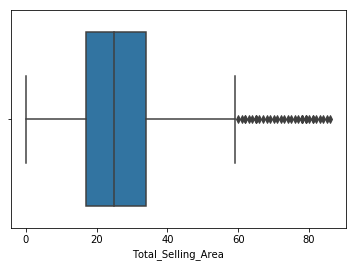

In [16]:
sb.boxplot(dataset['Total_Selling_Area'])

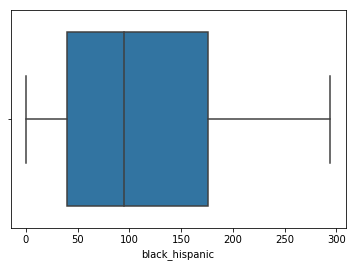

In [17]:
sb.boxplot(dataset['black_hispanic'])

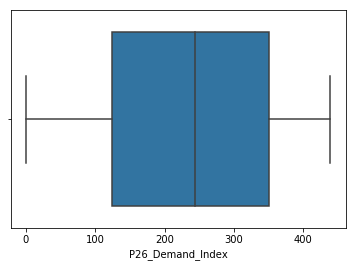

In [21]:
sb.boxplot(dataset['P26_Demand_Index'])

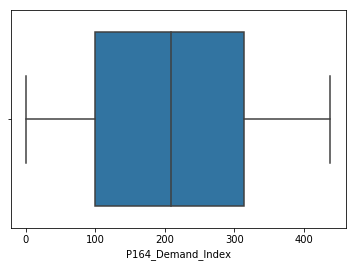

In [22]:
sb.boxplot(dataset['P164_Demand_Index'])

###  Bivariant Analysis

437    2
273    2
375    2
343    2
169    2
171    1
174    1
173    1
172    1
170    1
Name: sales, dtype: int64


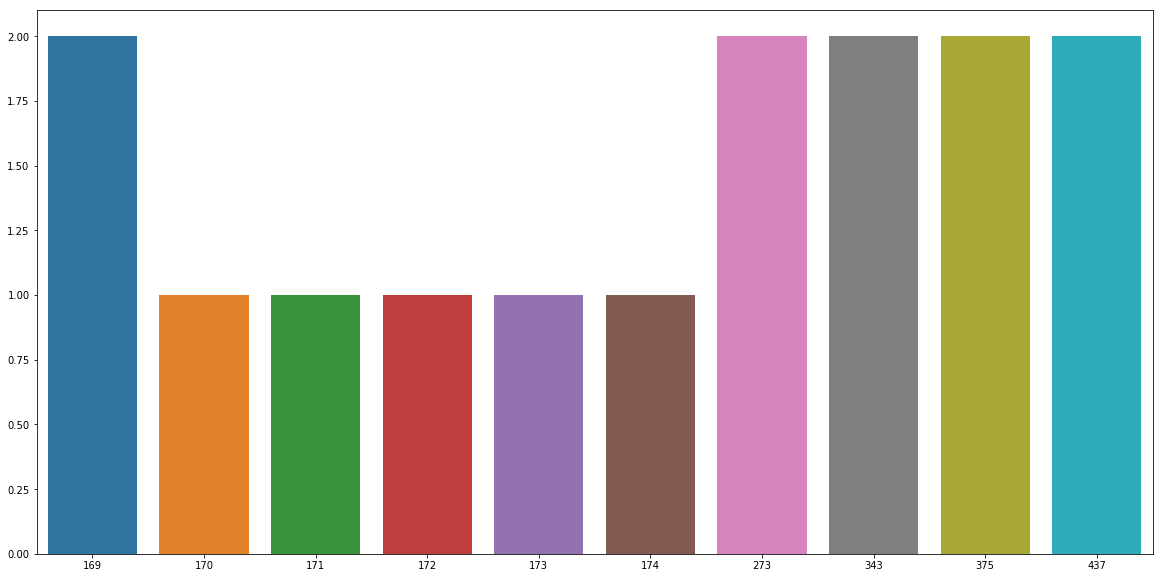

In [19]:
plt.figure(figsize=(20,10))
top_sales = dataset["sales"].value_counts().head(10)
print(top_sales)
sb.barplot(x=top_sales.index,y=top_sales.values)
# sb.countplot(x = 'sales',data=dataset)

### 4.Outlier Treatment

#### No need for outlier treatment because from business perspective we can have sales more

### 5. MinMax Scalar

#### Min Max Scalar or Min Max Normalization
#### It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values). 
#### This is done for distance based algorithms

In [31]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
mn.fit(dataset)
x = mn.transform(dataset)

C:\Users\sanidhya.arun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
x = pd.DataFrame(x)

In [33]:
x.columns = dataset.columns
dataset=x

In [34]:
# dataset.head()

In [35]:
dataset.describe()

,black_hispanic,Hispanic_HHs_Index,HHs_Index_Income_75K_9999K,HHs_55_64,Total_Selling_Area,Store_Format,P26_Demand_Index,P164_Demand_Index,sales,format,...,Chiller_flag,sf1,sf2,sf3,channel_1,channel_2,channel_3,channel_4,channel_5,geography
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,...,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,0.379323,0.333600,0.509845,0.477286,0.321742,0.226622,0.535864,0.478960,0.501113,0.226622,...,0.727735,0.690840,0.049618,0.080153,0.372137,0.089695,0.066794,0.240458,0.146947,0.116412
std,0.284662,0.271055,0.205894,0.274833,0.192915,0.377172,0.292805,0.283828,0.288869,0.377172,...,0.186894,0.462589,0.217363,0.271789,0.483837,0.286017,0.249903,0.427770,0.354391,0.321025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135204,0.112903,0.373832,0.244216,0.197674,0.000000,0.284169,0.226027,0.252413,0.000000,...,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.321429,0.247312,0.518692,0.464010,0.290698,0.000000,0.556948,0.478311,0.502896,0.000000,...,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.598639,0.516129,0.644860,0.701799,0.395349,0.500000,0.800114,0.715183,0.749517,0.500000,...,0.666667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building

In [52]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(x)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
len(km.labels_)

524

In [54]:
dataset = pd.read_excel("C:\\ML_Practice_Data\\Sample Dataset.xlsx",encoding ="latin1" )

In [55]:
dataset['Cluster'] = km.labels_

### Model Interpretation

In [56]:
dataset['Cluster'].value_counts()

0    362
1    162
Name: Cluster, dtype: int64

In [57]:
dataset['Cluster'].value_counts(normalize = True)*100

0    69.083969
1    30.916031
Name: Cluster, dtype: float64

In [ ]:
### Both the clusters are showing same pettern for sales vs black_hispanic.

In [59]:
dataset[dataset['Cluster']==0].describe()

,black_hispanic,Hispanic_HHs_Index,HHs_Index_Income_75K_9999K,HHs_55_64,Total_Selling_Area,P26_Demand_Index,P164_Demand_Index,sales,format,cluster_flag,...,sf1,sf2,sf3,channel_1,channel_2,channel_3,channel_4,channel_5,Unnamed: 22,Cluster
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0,362.000000,...,362.0,362.0,362.0,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0
mean,183.961326,66.643646,108.254144,488.831492,43287.292818,105.897928,101.781131,75.001917,1.0,2.483425,...,1.0,0.0,0.0,0.422652,0.091160,0.041436,0.223757,0.135359,181.500000,0.0
std,240.833844,72.892419,24.051228,199.510653,8702.233538,16.658910,17.356295,38.441116,0.0,1.574028,...,0.0,0.0,0.0,0.494665,0.288235,0.199573,0.417338,0.342580,104.644637,0.0
min,1.000000,3.000000,42.000000,167.000000,19000.000000,52.060692,67.006428,14.235556,1.0,1.000000,...,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,40.000000,20.000000,93.000000,340.250000,38000.000000,97.482469,90.000000,46.663689,1.0,1.000000,...,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,91.250000,0.0
50%,107.000000,41.000000,109.500000,453.000000,44000.000000,107.100433,100.661083,65.759544,1.0,2.000000,...,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,181.500000,0.0
75%,222.000000,90.750000,125.000000,598.250000,50000.000000,116.000000,112.000000,97.333333,1.0,4.000000,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,271.750000,0.0
max,1950.000000,545.000000,189.000000,1248.000000,60000.000000,156.353616,198.202137,250.740741,1.0,6.000000,...,1.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,362.000000,0.0


In [60]:
dataset[dataset['Cluster']==1].describe()

,black_hispanic,Hispanic_HHs_Index,HHs_Index_Income_75K_9999K,HHs_55_64,Total_Selling_Area,P26_Demand_Index,P164_Demand_Index,sales,format,cluster_flag,...,sf1,sf2,sf3,channel_1,channel_2,channel_3,channel_4,channel_5,Unnamed: 22,Cluster
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.0,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,136.000000,162.0
mean,292.679012,92.537037,108.888889,646.722222,72135.802469,108.073689,101.733838,104.650970,3.932099,2.388889,...,0.0,0.160494,0.259259,0.259259,0.086420,0.123457,0.277778,0.172840,456.500000,1.0
std,632.795009,71.580137,20.872282,562.326967,56633.123132,15.979229,16.756499,65.700771,1.190681,1.553397,...,0.0,0.368202,0.439587,0.439587,0.281854,0.329981,0.449292,0.379281,39.403892,0.0
min,1.000000,6.000000,57.000000,84.000000,18000.000000,51.533147,69.263975,10.290000,2.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,389.000000,1.0
25%,44.250000,38.250000,97.000000,248.000000,31000.000000,99.076915,90.066858,54.818942,3.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,422.750000,1.0
50%,100.000000,67.000000,109.500000,430.000000,45000.000000,109.607351,100.714916,84.678953,5.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,456.500000,1.0
75%,220.750000,133.750000,122.000000,820.500000,96750.000000,117.200305,112.905478,150.212167,5.000000,3.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,490.250000,1.0
max,4136.000000,334.000000,176.000000,2500.000000,233000.000000,144.085728,162.521265,296.740741,5.000000,6.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,524.000000,1.0


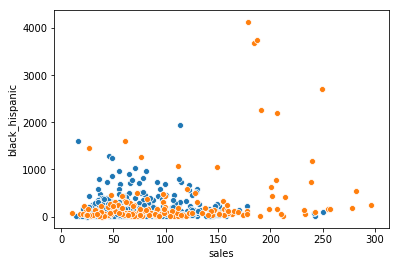

In [58]:
sb.scatterplot(x = "sales", y = "black_hispanic", data = dataset[dataset["Cluster"]==0])
sb.scatterplot(x = "sales", y = "black_hispanic", data = dataset[dataset["Cluster"]==1])
# sb.scatterplot(x = "sales", y = "black_hispanic", data = dataset[dataset["Cluster"]==2])
# sb.scatterplot(x = "sales", y = "Total_Selling_Area", data = dataset[dataset["Cluster"]==4])
# sb.scatterplot(x = "sales", y = "Total_Selling_Area", data = dataset[dataset["Cluster"]==5])
# sb.scatterplot(x = "sales", y = "Total_Selling_Area", data = dataset[dataset["Cluster"]==6])
plt.show()